In [1]:
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = "C:\\Users\\Flore\\Desktop\\EDA_SURF ESKOLA\\turismo_receptor_provincia_pais_ARCHIVO_LIMPIO.csv"
turism = pd.read_csv(path, sep=",")
turism

,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2023,1,A Coru�a,Am�rica,Argentina,295.0,"3098,0","10,5"
1,2023,1,A Coru�a,Am�rica,Brasil,498.0,"4084,0","8,2"
2,2023,1,A Coru�a,Am�rica,Canad�,1385.0,"15512,0","11,2"
3,2023,1,A Coru�a,Am�rica,Chile,58.0,"505,0","8,7"
4,2023,1,A Coru�a,Am�rica,Colombia,370.0,"4662,0","12,6"
...,...,...,...,...,...,...,...,...
68083,2024,12,�vila,Europa,Reino Unido,192.0,"1536,0","8,0"
68084,2024,12,�vila,Europa,Ruman�a,135.0,"2160,0","16,0"
68085,2024,12,�vila,Europa,Suecia,296.0,"5180,0","17,5"
68086,2024,12,�vila,Europa,Suiza,98.0,"490,0","5,0"


In [3]:
df= pd.DataFrame(turism)


# Filtro por años
filtro = df[df["AÑO"]>=2024]
turistas= pd.DataFrame(filtro)

#Agrupo los turistas por provincias
agrupado= turistas.groupby(["PROVINCIA_DESTINO", "PAIS_ORIGEN"])["TURISTAS"].sum().reset_index()

#Codigo para ir sacando las graficas por las provincias que me interesan para el estudio

provincia= agrupado[agrupado["PROVINCIA_DESTINO"]== "Bizkaia"]
provincia.sort_values(["TURISTAS"], ascending=False)



,PROVINCIA_DESTINO,PAIS_ORIGEN,TURISTAS
663,Bizkaia,Francia,166076.0
634,Bizkaia,Alemania,115761.0
697,Bizkaia,Pa�ses Bajos,72628.0
701,Bizkaia,Reino Unido,59691.0
675,Bizkaia,Italia,38702.0
...,...,...,...
710,Bizkaia,Sud�frica,62.0
703,Bizkaia,Rep�blica Dominicana,44.0
715,Bizkaia,T�nez,41.0
656,Bizkaia,El Salvador,30.0


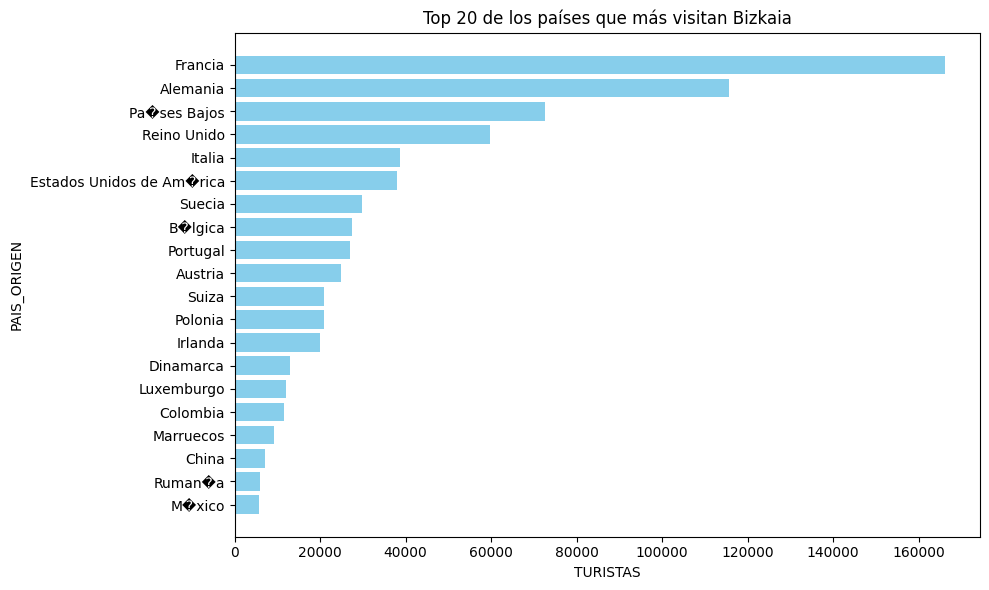

In [18]:
# Seleccionar los 20 países con más turistas

top_20 = provincia.sort_values("TURISTAS", ascending=False).head(20)

#Crear una gráfica horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_20["PAIS_ORIGEN"], top_20["TURISTAS"], color='skyblue')
plt.xlabel("TURISTAS")
plt.ylabel("PAIS_ORIGEN")
plt.title("Top 20 de los países que más visitan Bizkaia")
plt.gca().invert_yaxis()  #Invertir el eje Y para que el país con más turistas esté arriba
plt.tight_layout()
#plt.yticks(["Francia","Alemania", "Países Bajos", "Reino Unido", "Italia", "Estados Unidos de América", "Suecia", "Bélgica", "Portugal", "Austria", "Suiza", "Polonia", "Irlanda", "Dinamarca", "Luxemburgo", "Colombia", "Marruecos", "China", "Rumanía", "México"])
#Mostrar la gráfica
plt.show()

C:\Users\Flore\AppData\Local\Temp\ipykernel_24636\594928297.py:32: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()


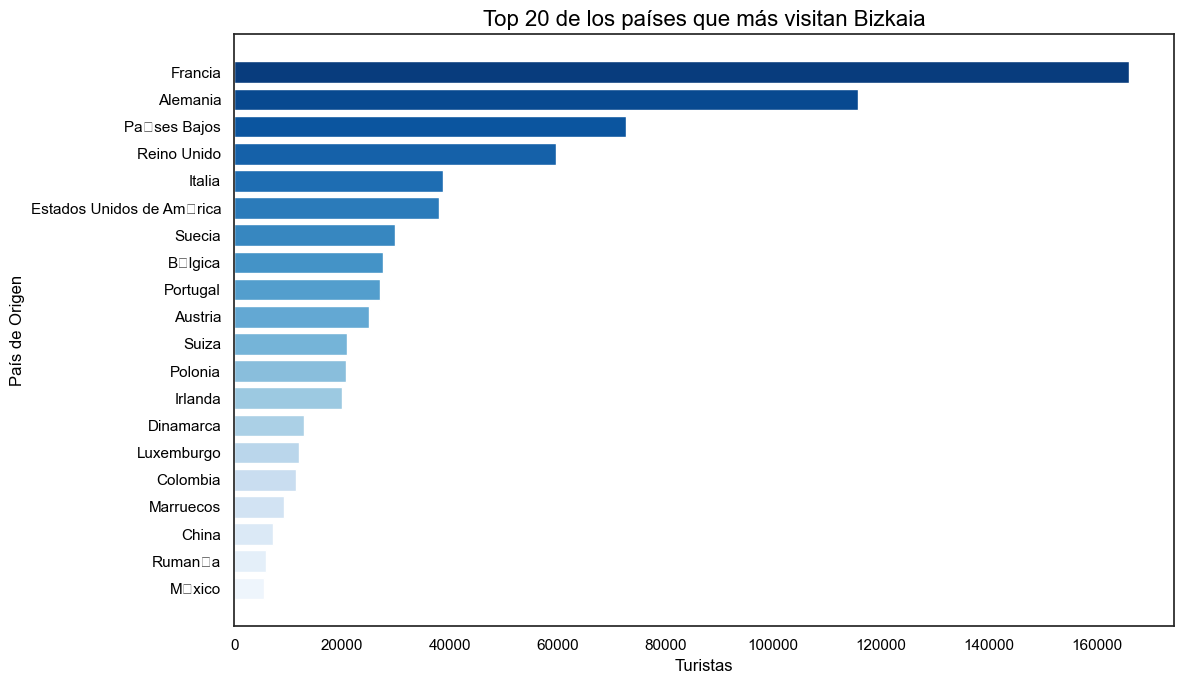

In [23]:
top_20 = provincia.sort_values("TURISTAS", ascending=False).head(20)

# Estilo con fondo blanco limpio
sns.set(style="white")

# Crear paleta de azules (oscuro a claro) y luego invertirla para que el valor más alto tenga el tono más oscuro
azul_pastel = sns.color_palette("Blues", n_colors=20)[::-1]

# Crear figura
plt.figure(figsize=(12, 7))

# Gráfico de barras horizontales con los colores aplicados
bars = plt.barh(
    top_20["PAIS_ORIGEN"],
    top_20["TURISTAS"],
    color=azul_pastel
)

# Invertir eje Y para que el país con más turistas esté arriba
plt.gca().invert_yaxis()

# Títulos y etiquetas
plt.title("Top 20 de los países que más visitan Bizkaia", fontsize=16, color='black')
plt.xlabel("Turistas", fontsize=12, color='black')
plt.ylabel("País de Origen", fontsize=12, color='black')

# Colores de los ejes
plt.xticks(color='black')
plt.yticks(color='black')

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()



C:\Users\Flore\AppData\Local\Temp\ipykernel_24636\1794687266.py:51: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Flore\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


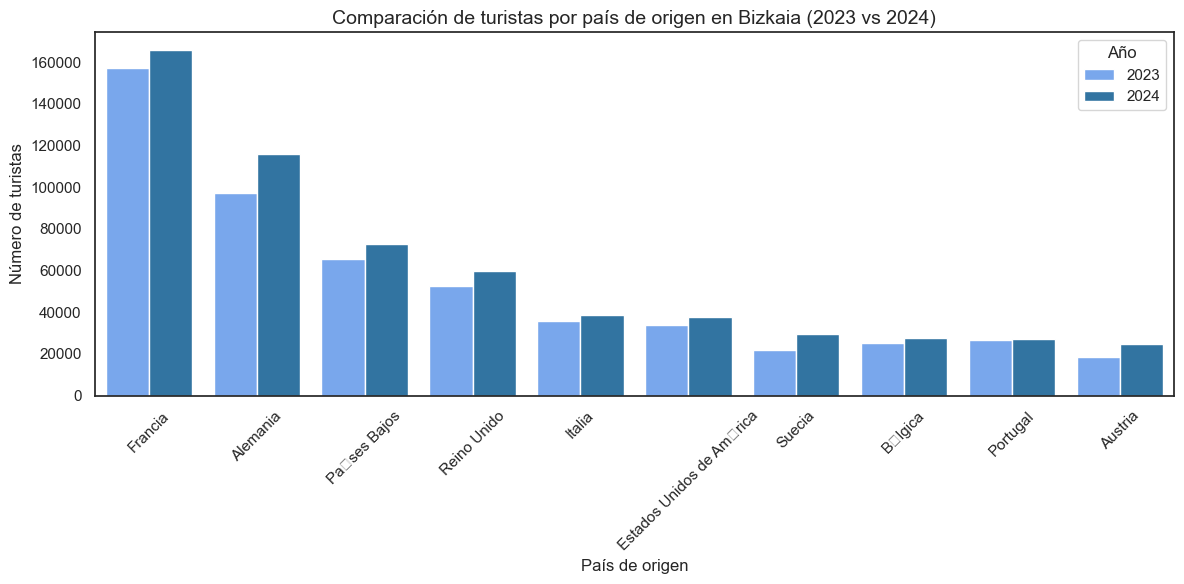

In [ ]:
df = pd.DataFrame(turism)

filtro= df[df["AÑO"].isin([2023, 2024])]
turistas = pd.DataFrame(filtro)

# Agrupar datos
agrupado =turistas.groupby(["AÑO", "PROVINCIA_DESTINO", "PAIS_ORIGEN"])["TURISTAS"].sum().reset_index()

# Filtrar por provincia
provincia = agrupado[agrupado["PROVINCIA_DESTINO"] == "Bizkaia"]


top_paises = provincia[provincia["AÑO"] == 2024].sort_values("TURISTAS", ascending=False).head(10)["PAIS_ORIGEN"]

# Crear todas las combinaciones posibles de AÑO y PAIS_ORIGEN
años = [2023, 2024]
combinaciones = pd.MultiIndex.from_product([años, top_paises], names=["AÑO", "PAIS_ORIGEN"]).to_frame(index=False)

# Unir con los datos originales
provincia_top = provincia[provincia["PAIS_ORIGEN"].isin(top_paises)]
provincia_top = provincia_top.merge(combinaciones, on=["AÑO", "PAIS_ORIGEN"], how="right")
provincia_top["TURISTAS"] = provincia_top["TURISTAS"].fillna(0)

# Orden del eje X según el 2024
orden_paises = provincia_top[provincia_top["AÑO"] == 2024].sort_values("TURISTAS", ascending=False)["PAIS_ORIGEN"].unique()

# Paleta personalizada
palette_custom = {
    2023: "#66a3ff",  # azul medio
    2024: "#1f77b4"   # azul más intenso
}

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=provincia_top,
    x="PAIS_ORIGEN",
    y="TURISTAS",
    hue="AÑO",
    order=orden_paises,
    palette=palette_custom
)

# Estética
plt.title("Comparación de turistas por país de origen en Bizkaia (2023 vs 2024)", fontsize=14)
plt.xlabel("País de origen")
plt.ylabel("Número de turistas")
plt.xticks(rotation=45)
plt.legend(title="Año", loc="upper right")
plt.tight_layout()
plt.show()